### Task #1: Perform imports and load the dataset into a pandas DataFrame

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.feature_extraction.text import CountVectorizer 
from sklearn.model_selection import train_test_split
from sklearn. naive_bayes import MultinomialNB

import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv('Language Detection.csv')

In [3]:
df.head()

,Text,Language
0,"Nature, in the broadest sense, is the natural...",English
1,"""Nature"" can refer to the phenomena of the phy...",English
2,"The study of nature is a large, if not the onl...",English
3,"Although humans are part of nature, human acti...",English
4,[1] The word nature is borrowed from the Old F...,English


In [4]:
df.shape

(2880, 2)

In [5]:
df.info

<bound method DataFrame.info of                                                    Text Language
0      Nature, in the broadest sense, is the natural...  English
1     "Nature" can refer to the phenomena of the phy...  English
2     The study of nature is a large, if not the onl...  English
3     Although humans are part of nature, human acti...  English
4     [1] The word nature is borrowed from the Old F...  English
...                                                 ...      ...
2875  ನಿಮ್ಮ ತಪ್ಪು ಏನು ಬಂದಿದೆಯೆಂದರೆ ಆ ದಿನದಿಂದ ನಿಮಗೆ ಒ...  Kannada
2876  ನಾರ್ಸಿಸಾ ತಾನು ಮೊದಲಿಗೆ ಹೆಣಗಾಡುತ್ತಿದ್ದ ಮಾರ್ಗಗಳನ್...  Kannada
2877  ಹೇಗೆ ' ನಾರ್ಸಿಸಿಸಮ್ ಈಗ ಮರಿಯನ್ ಅವರಿಗೆ ಸಂಭವಿಸಿದ ಎ...  Kannada
2878  ಅವಳು ಈಗ ಹೆಚ್ಚು ಚಿನ್ನದ ಬ್ರೆಡ್ ಬಯಸುವುದಿಲ್ಲ ಎಂದು ...  Kannada
2879  ಟೆರ್ರಿ ನೀವು ನಿಜವಾಗಿಯೂ ಆ ದೇವದೂತನಂತೆ ಸ್ವಲ್ಪ ಕಾಣು...  Kannada

[2880 rows x 2 columns]>

In [6]:
df[df.duplicated()]

,Text,Language
1141,i'm sorry.,English
1180,oh my god.,English
1196,i'm sorry.,English
1724,എന്നോട് ക്ഷമിക്കൂ.,Malyalam
1767,ഓ എന്റെ ദൈവമേ.,Malyalam
1783,എന്നോട് ക്ഷമിക്കൂ.,Malyalam
2013,कैसा चल रहा है?,Hindi
2219,அது எப்படி நடக்கிறது?,Tamil
2258,என்னை மன்னிக்கவும்.,Tamil
2300,கடவுளே.,Tamil


In [7]:
len(df[df.duplicated()])

15

In [8]:
df["Language"].nunique()

5

In [9]:
df["Language"].value_counts()

English     1385
Malyalam     594
Tamil        469
Kannada      369
Hindi         63
Name: Language, dtype: int64

### Task #2: Check for missing values:

In [10]:
df.isnull().sum()

Text        0
Language    0
dtype: int64

### Task #3: Check for different target labels:

In [11]:
df['Language'].value_counts()

English     1385
Malyalam     594
Tamil        469
Kannada      369
Hindi         63
Name: Language, dtype: int64

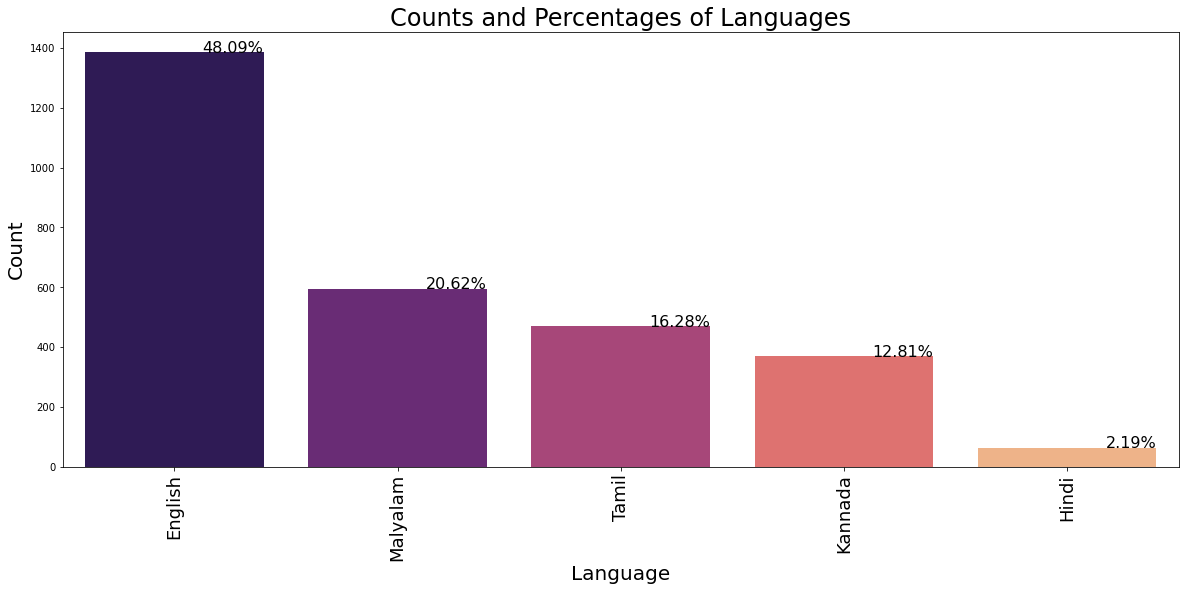

In [12]:
plt.figure(figsize=(20,8))

total= float(len(df['Language']))
ax= sns.countplot(x= 'Language', data= df, order= df['Language'].value_counts().index, palette= 'magma')

for p in ax.patches:
    percentage= '{:.2f}%'.format(100 * p.get_height()/total)
    x= p.get_x() + p.get_width()
    y= p.get_height()
    ax.annotate(percentage, (x, y), fontsize=16, ha="right")
    
plt.title('Counts and Percentages of Languages', fontsize=24)
plt.xlabel("Language",fontsize=20)
plt.ylabel("Count", fontsize=20)
plt.xticks(size= 18, rotation=90) 
plt.show()

In [13]:
language= df['Language'].value_counts().reset_index()
language

,index,Language
0,English,1385
1,Malyalam,594
2,Tamil,469
3,Kannada,369
4,Hindi,63


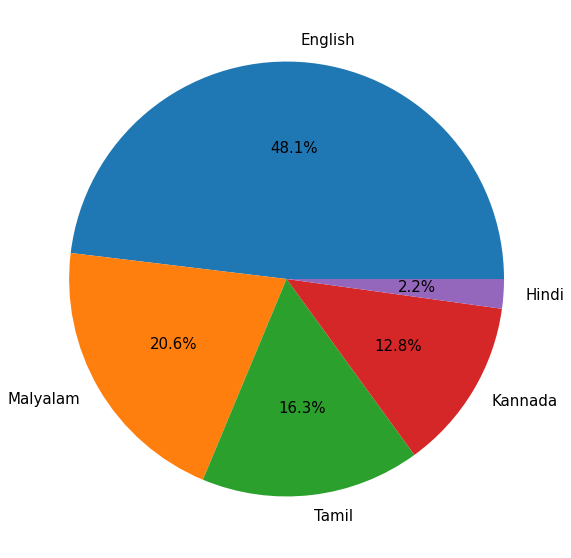

In [14]:
plt.figure(figsize=(10,10))

#create pie chart
labels= language['index']

plt.pie(language["Language"], labels= labels, autopct='%.1f%%', textprops={'fontsize': 15})

plt.show()


In [15]:
#CLEANING THE TEXT
df1= df.copy()
df1['cleaned_Text']= ""
df1

,Text,Language,cleaned_Text
0,"Nature, in the broadest sense, is the natural...",English,
1,"""Nature"" can refer to the phenomena of the phy...",English,
2,"The study of nature is a large, if not the onl...",English,
3,"Although humans are part of nature, human acti...",English,
4,[1] The word nature is borrowed from the Old F...,English,
...,...,...,...
2875,ನಿಮ್ಮ ತಪ್ಪು ಏನು ಬಂದಿದೆಯೆಂದರೆ ಆ ದಿನದಿಂದ ನಿಮಗೆ ಒ...,Kannada,
2876,ನಾರ್ಸಿಸಾ ತಾನು ಮೊದಲಿಗೆ ಹೆಣಗಾಡುತ್ತಿದ್ದ ಮಾರ್ಗಗಳನ್...,Kannada,
2877,ಹೇಗೆ ' ನಾರ್ಸಿಸಿಸಮ್ ಈಗ ಮರಿಯನ್ ಅವರಿಗೆ ಸಂಭವಿಸಿದ ಎ...,Kannada,
2878,ಅವಳು ಈಗ ಹೆಚ್ಚು ಚಿನ್ನದ ಬ್ರೆಡ್ ಬಯಸುವುದಿಲ್ಲ ಎಂದು ...,Kannada,


In [16]:
import re
def clean_function(Text):
    # removing the symbols and numbers
    Text = re.sub(r'[\([{})\]!@#$,"%^*?:;~`0-9]', ' ', Text)
    
    # converting the text to lower case
    Text = Text.lower()
    Text = re.sub('http\S+\s*', ' ', Text)  # remove URLs
    Text = re.sub('RT|cc', ' ', Text)  # remove RT and cc
    Text = re.sub('#\S+', '', Text)  # remove hashtags
    Text = re.sub('@\S+', '  ', Text)  # remove mentions
    Text = re.sub('\s+', ' ', Text)  # remove extra whitespace
    
    return Text

In [17]:
df1['cleaned_Text'] = df1['Text'].apply(lambda x: clean_function(x))
df1

,Text,Language,cleaned_Text
0,"Nature, in the broadest sense, is the natural...",English,nature in the broadest sense is the natural p...
1,"""Nature"" can refer to the phenomena of the phy...",English,nature can refer to the phenomena of the phys...
2,"The study of nature is a large, if not the onl...",English,the study of nature is a large if not the only...
3,"Although humans are part of nature, human acti...",English,although humans are part of nature human activ...
4,[1] The word nature is borrowed from the Old F...,English,the word nature is borrowed from the old fren...
...,...,...,...
2875,ನಿಮ್ಮ ತಪ್ಪು ಏನು ಬಂದಿದೆಯೆಂದರೆ ಆ ದಿನದಿಂದ ನಿಮಗೆ ಒ...,Kannada,ನಿಮ್ಮ ತಪ್ಪು ಏನು ಬಂದಿದೆಯೆಂದರೆ ಆ ದಿನದಿಂದ ನಿಮಗೆ ಒ...
2876,ನಾರ್ಸಿಸಾ ತಾನು ಮೊದಲಿಗೆ ಹೆಣಗಾಡುತ್ತಿದ್ದ ಮಾರ್ಗಗಳನ್...,Kannada,ನಾರ್ಸಿಸಾ ತಾನು ಮೊದಲಿಗೆ ಹೆಣಗಾಡುತ್ತಿದ್ದ ಮಾರ್ಗಗಳನ್...
2877,ಹೇಗೆ ' ನಾರ್ಸಿಸಿಸಮ್ ಈಗ ಮರಿಯನ್ ಅವರಿಗೆ ಸಂಭವಿಸಿದ ಎ...,Kannada,ಹೇಗೆ ' ನಾರ್ಸಿಸಿಸಮ್ ಈಗ ಮರಿಯನ್ ಅವರಿಗೆ ಸಂಭವಿಸಿದ ಎ...
2878,ಅವಳು ಈಗ ಹೆಚ್ಚು ಚಿನ್ನದ ಬ್ರೆಡ್ ಬಯಸುವುದಿಲ್ಲ ಎಂದು ...,Kannada,ಅವಳು ಈಗ ಹೆಚ್ಚು ಚಿನ್ನದ ಬ್ರೆಡ್ ಬಯಸುವುದಿಲ್ಲ ಎಂದು ...


In [18]:
X=df1["cleaned_Text"]
y=df1["Language"]

In [19]:
from sklearn.preprocessing import LabelEncoder
lb=LabelEncoder()
y=lb.fit_transform(y)


In [20]:
from sklearn.feature_extraction.text import CountVectorizer
CV= CountVectorizer()
X= CV.fit_transform(X).toarray()
X.shape

(2880, 7718)

### Task #4: Split the data into train & test sets:

In [21]:
X = df['Text']
y = df['Language']

In [22]:
import re
data_list = []
for text in X:
    text = re.sub(r'[!@#$(),n"%^*?:;~`0-9]', ' ', text)
    text = re.sub(r'[[]]', ' ', text)
    text = text.lower()
    data_list.append(text)

In [23]:
X = data_list

In [24]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [25]:
len(X_train)

1929

In [26]:
len(X_test)

951

### Task #5: Build a pipeline to vectorize the date, then train and fit a model

In [27]:
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import LinearSVC

lang_clf = Pipeline([('tfidf', TfidfVectorizer()), ('clf', LinearSVC())])

lang_clf.fit(X_train, y_train)

Pipeline(steps=[('tfidf', TfidfVectorizer()), ('clf', LinearSVC())])

In [28]:
Predictions = lang_clf.predict(X_test)

### Task #6: Run predictions and analyze the results

In [29]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

In [30]:
print(confusion_matrix(y_test, Predictions))

[[468   0   0   0   0]
 [  2  16   0   0   0]
 [  7   0 114   0   0]
 [  4   0   0 196   0]
 [  4   0   0   0 140]]


In [31]:
print(classification_report(y_test, Predictions))

              precision    recall  f1-score   support

     English       0.96      1.00      0.98       468
       Hindi       1.00      0.89      0.94        18
     Kannada       1.00      0.94      0.97       121
    Malyalam       1.00      0.98      0.99       200
       Tamil       1.00      0.97      0.99       144

    accuracy                           0.98       951
   macro avg       0.99      0.96      0.97       951
weighted avg       0.98      0.98      0.98       951



In [32]:
print(accuracy_score(y_test, Predictions))

0.982124079915878


### Task #7: Now, Test with random input language phrase - "Hi, How are you?"

In [33]:
# English
lang_clf.predict(["Hi, how are you?"])

array(['English'], dtype=object)

In [34]:
# Hindi
lang_clf.predict(["नमस्ते, आप कैसे हैं?"])

array(['Hindi'], dtype=object)

In [35]:
# Kannada
lang_clf.predict(["ನಮಸ್ಕಾರ ಹೇಗಿದ್ದೀರಾ?"])

array(['Kannada'], dtype=object)

In [36]:
# Tamil
lang_clf.predict(["ஹாய், நீங்கள் எப்படி இருக்கிறீர்கள்?"])

array(['Tamil'], dtype=object)

In [37]:
ans=lang_clf.predict(["Hi, how are you?"])
result=ans[0]
print(result)

English


In [38]:
from tkinter import *
window=Tk()

In [39]:
def sms():
    a=entry1.get()
    r=lang_clf.predict([a])
    ss=r[0]
    entry2.insert(0,ss)
def delete():
    entry1.delete(0,END)
    entry2.delete(0,END)

In [40]:
window.configure(background='#0096DC')

In [41]:
label1=Label(window,text="Enter text:",padx=20,pady=10,fg='white',bg='#0096DC')
label2=Label(window,text="Language classified as:",padx=20,pady=10,fg='white',bg='#0096DC')
entry1=Entry(window,width=30,borderwidth=5)
entry2=Entry(window,width=30,borderwidth=5)
submit=Button(window,text="Submit",padx=20,pady=10,command=sms,bg='white',fg='black')
clear=Button(window,text="Clear",padx=20,pady=10,command=delete)

In [42]:
label1.grid(row=0,column=0)
label2.grid(row=1,column=0)
entry1.grid(row=0,column=1)
entry2.grid(row=1,column=1)
submit.grid(row=2,column=0)
#entry3.grid(row=1,column=1,rpan=2)
clear.grid(row=2,column=1)

In [ ]:
window.mainloop()